# Installing Dependencies

In [76]:
import tensorflow as tf
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Activation, ZeroPadding2D, BatchNormalization
from tensorflow.keras.layers import AveragePooling2D,  Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.utils import plot_model
from tensorflow.keras import applications
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
K.set_image_data_format('channels_last')

from IPython.display import SVG
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

import h5py
import random
import requests

In [2]:
import cv2 as cv 
from matplotlib import pyplot as plt 

# Loading Data

In [3]:
datapath_nebulae = 'Nebula-Galaxy-Cluster Dataset/Nebulae'
datapath_galaxies = 'Nebula-Galaxy-Cluster Dataset/Galaxies'
datapath_clusters = 'Nebula-Galaxy-Cluster Dataset/Clusters'

In [4]:
files_nebulae = os.listdir(datapath_nebulae)
files_galaxies = os.listdir(datapath_galaxies)
files_clusters = os.listdir(datapath_clusters)
# Count the number of files
num_files_nebulae = len(files_nebulae)
num_files_galaxies = len(files_galaxies)
num_files_clusters = len(files_clusters)

print("Number of files in the folder:", num_files_nebulae)

print("Number of files in the folder:", num_files_galaxies)
print("Number of files in the folder:", num_files_clusters)

Number of files in the folder: 1022
Number of files in the folder: 2673
Number of files in the folder: 476


In [27]:
datapath = 'Nebula-Galaxy-Cluster Dataset'
img = cv.imread(os.path.join(datapath, 'Clusters', 'ann0715.jpg'))
img.shape

(300, 401, 3)

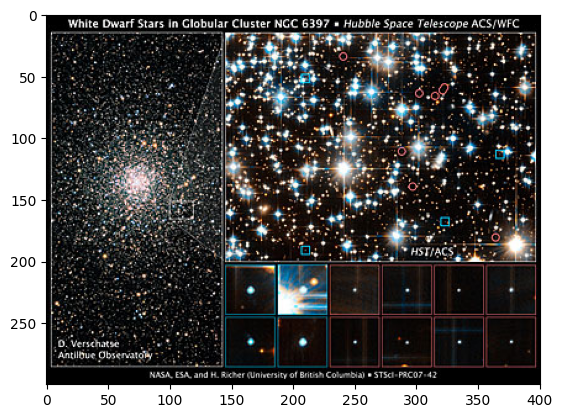

In [28]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)) 
plt.show()

In [32]:
data = tf.keras.utils.image_dataset_from_directory(datapath)
print(data.class_names)


Found 4181 files belonging to 3 classes.
['Clusters', 'Galaxies', 'Nebulae']


In [8]:
data_array = data.as_numpy_iterator()
data_array

In [9]:
batch = data_array.next()
for i, class_name in enumerate(data.class_names):
    print(f"{class_name}: {i}")

Clusters: 0
Galaxies: 1
Nebulae: 2


In [10]:
len(batch[0])

32

# Data Preprocessing
Part of the preprocessing done was using transformations of images for a larger dataset

## Resizing images

In [40]:
import pathlib

In [43]:
celestial_data = pathlib.Path(datapath)

In [44]:
all_nebulae = list(celestial_data.glob('Nebulae/*'))

Nebula-Galaxy-Cluster Dataset/Nebulae/heic1113a.jpg


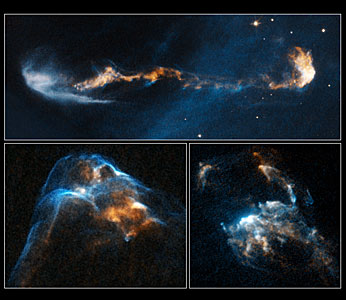

In [52]:
import PIL
print(all_nebulae[4])
PIL.Image.open(str(all_nebulae[4]))

In [65]:
 tf.keras.preprocessing.image_dataset_from_directory??

Signature:
tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structu

In [64]:
train_set = tf.keras.preprocessing.image_dataset_from_directory(
celestial_data,
validation_split=0.2,
subset="training",
seed=123,
)

Found 4181 files belonging to 3 classes.
Using 3345 files for training.


In [56]:
train_set.class_names

['Clusters', 'Galaxies', 'Nebulae']

In [58]:
val_set = tf.keras.preprocessing.image_dataset_from_directory(
celestial_data,
validation_split=0.2,
subset="validation",
seed=123,
)


Found 4181 files belonging to 3 classes.
Using 836 files for validation.


In [59]:
val_set.class_names

['Clusters', 'Galaxies', 'Nebulae']

# ResNet model

In [72]:
imported_model= tf.keras.applications.ResNet50(include_top=False,
input_shape=(256,256,3),
pooling='avg',classes=3,
weights='imagenet')
for layer in imported_model.layers:
    layer.trainable=False

94765736/94765736 [==============================] - 67s 1us/step


In [74]:
dnn_model = Sequential()
dnn_model.add(imported_model)
dnn_model.add(Flatten())
dnn_model.add(Dense(512, activation='relu'))
dnn_model.add(Dense(3, activation='softmax'))

In [78]:
dnn_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [112]:

history = dnn_model.fit(
train_set,
validation_data=val_set,
epochs=20
)

Epoch 1/20
105/105 [==============================] - 1050s 10s/step - loss: 0.0627 - accuracy: 0.9749 - val_loss: 0.3084 - val_accuracy: 0.9175
Epoch 2/20
105/105 [==============================] - 845s 8s/step - loss: 0.0634 - accuracy: 0.9746 - val_loss: 0.2937 - val_accuracy: 0.9151
Epoch 3/20
105/105 [==============================] - 814s 8s/step - loss: 0.0596 - accuracy: 0.9755 - val_loss: 0.2890 - val_accuracy: 0.9187
Epoch 4/20
105/105 [==============================] - 847s 8s/step - loss: 0.0662 - accuracy: 0.9746 - val_loss: 0.2810 - val_accuracy: 0.9222
Epoch 5/20
105/105 [==============================] - 818s 8s/step - loss: 0.0554 - accuracy: 0.9776 - val_loss: 0.2756 - val_accuracy: 0.9342
Epoch 6/20
105/105 [==============================] - 849s 8s/step - loss: 0.0657 - accuracy: 0.9764 - val_loss: 0.3000 - val_accuracy: 0.9234
Epoch 7/20
105/105 [==============================] - 832s 8s/step - loss: 0.0642 - accuracy: 0.9740 - val_loss: 0.2949 - val_accuracy: 0.92

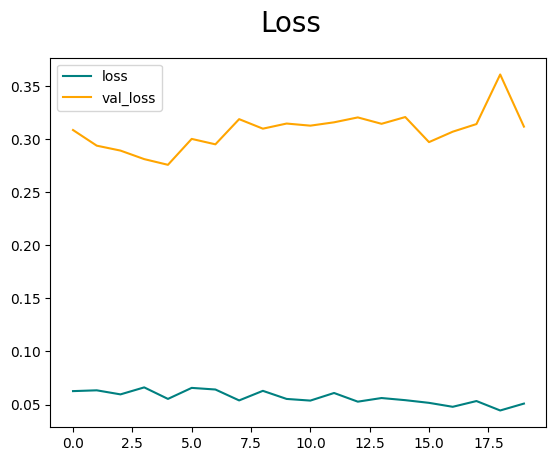

In [116]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

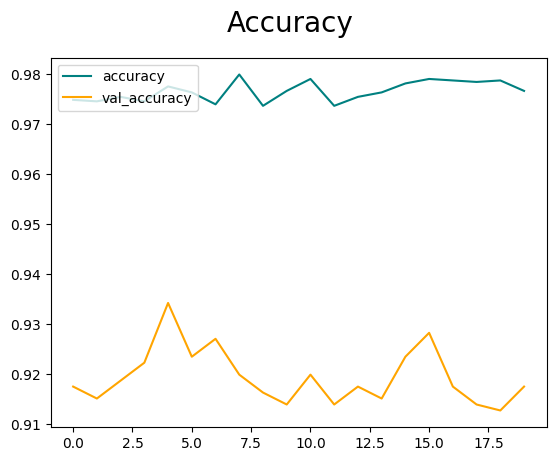

In [114]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

(1, 256, 256, 3)


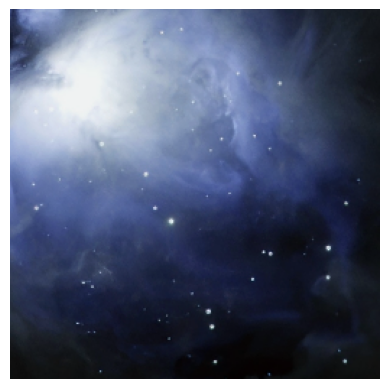

In [229]:
image=cv.imread('yolov7/DeepSpaceYoloDataset/images/test/1714.jpg')
image_resized= cv.resize(image, (256, 256))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)
plt.imshow(image_resized)
plt.axis('off')  # Hide axis
plt.show()

In [125]:
model_pred=dnn_model.predict(image)


1/1 [==============================] - 0s 396ms/step


In [126]:
predicted_class=np.argmax(model_pred)
print("The predicted category is", predicted_class)

The predicted category is 2


(1, 256, 256, 3)


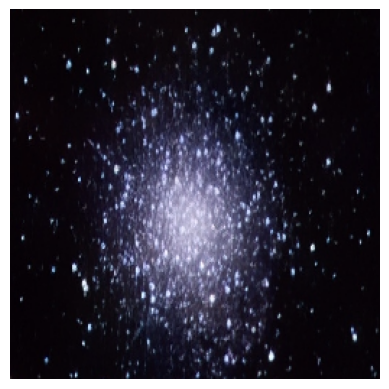

Width: 256, Height: 256


In [226]:
image=cv.imread('Screenshot 2024-03-12 at 1.59.39 AM.png')
image_resized= cv.resize(image, (256, 256))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)
plt.imshow(image_resized)
plt.axis('off')  # Hide axis
plt.show()


# Get the resolution
height, width, _ = image_resized.shape
print(f"Width: {width}, Height: {height}")

In [227]:
model_pred=dnn_model.predict(image)


1/1 [==============================] - 1s 609ms/step


In [228]:
predicted_class=np.argmax(model_pred)
print("The predicted category is", predicted_class)

The predicted category is 0
